<a href="https://colab.research.google.com/github/PiotrusWatson/level4project/blob/master/data/ipynbs/BERT_attempt_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

lets get the snli dataset baybee

In [0]:
!wget https://nlp.stanford.edu/projects/snli/snli_1.0.zip
!unzip snli_1.0.zip

--2019-12-19 15:13:07--  https://nlp.stanford.edu/projects/snli/snli_1.0.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94550081 (90M) [application/zip]
Saving to: ‘snli_1.0.zip’

snli_1.0.zip        100%[===================>]  90.17M  21.0MB/s    in 7.2s    

2019-12-19 15:13:16 (12.6 MB/s) - ‘snli_1.0.zip’ saved [94550081/94550081]

Archive:  snli_1.0.zip
   creating: snli_1.0/
  inflating: snli_1.0/.DS_Store      
   creating: __MACOSX/
   creating: __MACOSX/snli_1.0/
  inflating: __MACOSX/snli_1.0/._.DS_Store  
 extracting: snli_1.0/Icon           
  inflating: __MACOSX/snli_1.0/._Icon  
  inflating: snli_1.0/README.txt     
  inflating: __MACOSX/snli_1.0/._README.txt  
  inflating: snli_1.0/snli_1.0_dev.jsonl  
  inflating: snli_1.0/snli_1.0_dev.txt  
  inflating: snli_1.0/snli_1.0_test.jsonl  
  inflating: snli_1.0/snli_1.0_

In [0]:
# Download the Glove.zip file and expand it.
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2019-12-19 15:13:24--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2019-12-19 15:13:25--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2019-12-19 15:13:25--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [0]:
# Get the PolitiFact Dataset from the location provided in the DeClarE paper.
!wget http://resources.mpi-inf.mpg.de/impact/dl_cred_analysis/PolitiFact.zip
!unzip PolitiFact.zip

--2019-12-19 15:20:20--  http://resources.mpi-inf.mpg.de/impact/dl_cred_analysis/PolitiFact.zip
Resolving resources.mpi-inf.mpg.de (resources.mpi-inf.mpg.de)... 139.19.206.46
Connecting to resources.mpi-inf.mpg.de (resources.mpi-inf.mpg.de)|139.19.206.46|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4976217 (4.7M) [application/zip]
Saving to: ‘PolitiFact.zip’

PolitiFact.zip      100%[===================>]   4.75M  2.21MB/s    in 2.1s    

2019-12-19 15:20:23 (2.21 MB/s) - ‘PolitiFact.zip’ saved [4976217/4976217]

Archive:  PolitiFact.zip
   creating: PolitiFact/
  inflating: PolitiFact/README       
  inflating: PolitiFact/politifact.tsv  


In [0]:
!git clone https://github.com/FakeNewsChallenge/fnc-1.git


Cloning into 'fnc-1'...
remote: Enumerating objects: 49, done.
remote: Total 49 (delta 0), reused 0 (delta 0), pack-reused 49
Unpacking objects: 100% (49/49), done.


In [0]:
# Get the Snopes Dataset from the location provided in the DeClarE paper.
!wget http://resources.mpi-inf.mpg.de/impact/dl_cred_analysis/Snopes.zip
!unzip Snopes.zip

--2019-12-19 15:20:33--  http://resources.mpi-inf.mpg.de/impact/dl_cred_analysis/Snopes.zip
Resolving resources.mpi-inf.mpg.de (resources.mpi-inf.mpg.de)... 139.19.206.46
Connecting to resources.mpi-inf.mpg.de (resources.mpi-inf.mpg.de)|139.19.206.46|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5559754 (5.3M) [application/zip]
Saving to: ‘Snopes.zip’

Snopes.zip          100%[===================>]   5.30M  2.40MB/s    in 2.2s    

2019-12-19 15:20:36 (2.40 MB/s) - ‘Snopes.zip’ saved [5559754/5559754]

Archive:  Snopes.zip
   creating: Snopes/
  inflating: Snopes/README           
  inflating: Snopes/snopes.tsv       


In [0]:
import pandas as pd
import numpy as np

import torch,keras

from sklearn.model_selection import train_test_split
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from torch.nn.parameter import Parameter
from torch.nn import init
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as data_utils

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import roc_curve, auc

import math



np.random.seed(128)

lets load this shit :^)

In [0]:
train_dataframe = pd.read_json('./snli_1.0/snli_1.0_train.jsonl', lines=True)
test_dataframe = pd.read_json('./snli_1.0/snli_1.0_test.jsonl', lines=True)


In [0]:
train_dataframe.head(50)

,annotator_labels,captionID,gold_label,pairID,sentence1,sentence1_binary_parse,sentence1_parse,sentence2,sentence2_binary_parse,sentence2_parse
0,[neutral],3416050480.jpg#4,neutral,3416050480.jpg#4r1n,A person on a horse jumps over a broken down a...,( ( ( A person ) ( on ( a horse ) ) ) ( ( jump...,(ROOT (S (NP (NP (DT A) (NN person)) (PP (IN o...,A person is training his horse for a competition.,( ( A person ) ( ( is ( ( training ( his horse...,(ROOT (S (NP (DT A) (NN person)) (VP (VBZ is) ...
1,[contradiction],3416050480.jpg#4,contradiction,3416050480.jpg#4r1c,A person on a horse jumps over a broken down a...,( ( ( A person ) ( on ( a horse ) ) ) ( ( jump...,(ROOT (S (NP (NP (DT A) (NN person)) (PP (IN o...,"A person is at a diner, ordering an omelette.",( ( A person ) ( ( ( ( is ( at ( a diner ) ) )...,(ROOT (S (NP (DT A) (NN person)) (VP (VBZ is) ...
2,[entailment],3416050480.jpg#4,entailment,3416050480.jpg#4r1e,A person on a horse jumps over a broken down a...,( ( ( A person ) ( on ( a horse ) ) ) ( ( jump...,(ROOT (S (NP (NP (DT A) (NN person)) (PP (IN o...,"A person is outdoors, on a horse.","( ( A person ) ( ( ( ( is outdoors ) , ) ( on ...",(ROOT (S (NP (DT A) (NN person)) (VP (VBZ is) ...
3,[neutral],2267923837.jpg#2,neutral,2267923837.jpg#2r1n,Children smiling and waving at camera,( Children ( ( ( smiling and ) waving ) ( at c...,(ROOT (NP (S (NP (NNP Children)) (VP (VBG smil...,They are smiling at their parents,( They ( are ( smiling ( at ( their parents ) ...,(ROOT (S (NP (PRP They)) (VP (VBP are) (VP (VB...
4,[entailment],2267923837.jpg#2,entailment,2267923837.jpg#2r1e,Children smiling and waving at camera,( Children ( ( ( smiling and ) waving ) ( at c...,(ROOT (NP (S (NP (NNP Children)) (VP (VBG smil...,There are children present,( There ( ( are children ) present ) ),(ROOT (S (NP (EX There)) (VP (VBP are) (NP (NN...
5,[contradiction],2267923837.jpg#2,contradiction,2267923837.jpg#2r1c,Children smiling and waving at camera,( Children ( ( ( smiling and ) waving ) ( at c...,(ROOT (NP (S (NP (NNP Children)) (VP (VBG smil...,The kids are frowning,( ( The kids ) ( are frowning ) ),(ROOT (S (NP (DT The) (NNS kids)) (VP (VBP are...
6,[contradiction],3691670743.jpg#0,contradiction,3691670743.jpg#0r1c,A boy is jumping on skateboard in the middle o...,( ( A boy ) ( ( is ( ( jumping ( on skateboard...,(ROOT (S (NP (DT A) (NN boy)) (VP (VBZ is) (VP...,The boy skates down the sidewalk.,( ( The boy ) ( ( ( skates down ) ( the sidewa...,(ROOT (S (NP (DT The) (NN boy)) (VP (VBZ skate...
7,[entailment],3691670743.jpg#0,entailment,3691670743.jpg#0r1e,A boy is jumping on skateboard in the middle o...,( ( A boy ) ( ( is ( ( jumping ( on skateboard...,(ROOT (S (NP (DT A) (NN boy)) (VP (VBZ is) (VP...,The boy does a skateboarding trick.,( ( The boy ) ( ( does ( a ( skateboarding tri...,(ROOT (S (NP (DT The) (NN boy)) (VP (VBZ does)...
8,[neutral],3691670743.jpg#0,neutral,3691670743.jpg#0r1n,A boy is jumping on skateboard in the middle o...,( ( A boy ) ( ( is ( ( jumping ( on skateboard...,(ROOT (S (NP (DT A) (NN boy)) (VP (VBZ is) (VP...,The boy is wearing safety equipment.,( ( The boy ) ( ( is ( wearing ( safety equipm...,(ROOT (S (NP (DT The) (NN boy)) (VP (VBZ is) (...
9,[neutral],4804607632.jpg#0,neutral,4804607632.jpg#0r1n,An older man sits with his orange juice at a s...,( ( An ( older man ) ) ( ( ( sits ( with ( ( h...,(ROOT (S (NP (DT An) (JJR older) (NN man)) (VP...,An older man drinks his juice as he waits for ...,( ( An ( older man ) ) ( ( ( drinks ( his juic...,(ROOT (S (NP (DT An) (JJR older) (NN man)) (VP...


Helper functions: something that bulk converts things into lists, and a tokeniser that also pads and numpies things

In [0]:
def merge_bodies(articles, claims):
  merged = pd.merge(articles, claims, on="Body ID")
  mapping = {"disagree": 0, "discuss": 1, "unrelated": 2, "agree": 3}
  return merged.replace({"Stance": mapping})
  
  
train_articles = pd.read_csv("./fnc-1/train_bodies.csv")
train_claims = pd.read_csv("./fnc-1/train_stances.csv")
test_articles = pd.read_csv("./fnc-1/test_bodies.csv")
test_claims = pd.read_csv("./fnc-1/test_stances_unlabeled.csv")


train_challenge = merge_bodies(train_articles, train_claims)

test_challenge = merge_bodies(test_articles, test_claims)
train_challenge.head()

,Body ID,articleBody,Headline,Stance
0,0,A small meteorite crashed into a wooded area i...,"Soldier shot, Parliament locked down after gun...",2
1,0,A small meteorite crashed into a wooded area i...,Tourist dubbed ‘Spider Man’ after spider burro...,2
2,0,A small meteorite crashed into a wooded area i...,Luke Somers 'killed in failed rescue attempt i...,2
3,0,A small meteorite crashed into a wooded area i...,BREAKING: Soldier shot at War Memorial in Ottawa,2
4,0,A small meteorite crashed into a wooded area i...,Giant 8ft 9in catfish weighing 19 stone caught...,2


also: lets load politifact :^^)

thing to divide true and false

In [0]:
# As can be seen from the statistics above, class 0 has 3 times more data than class 1
# Method to divide input data into true and false dataframes and return them
def divide_truefalse(fact):
  col = ['cred_label','claim_id','claim_text','article','article_source','bin_cred_label']
  true_data= list()
  false_data=list()
  for index, row in fact.iterrows():
    if row['cred_label'] == 'true' or row['cred_label'] == 'mostly true':
      true_data.append(row)
    else:
      false_data.append(row)

  data_frame_true = pd.DataFrame(true_data,columns=col)
  data_frame_false = pd.DataFrame(false_data,columns=col)
  return data_frame_true,data_frame_false

Preprocessing snopes data so that it has equal amounts of true and false

In [0]:
snopes = pd.read_csv("./Snopes/snopes.tsv", delimiter= "\t", names=['cred_label','claim_id','claim_text','article','article_source'])
mapping = {"true": 1, "half-true": 1, "mostly true": 1, "mostly false": 0, "pants on fire":0, "false":0}
snopes = snopes.replace({"cred_label": mapping})
snopes_true, snopes_false = divide_truefalse(snopes)
top = snopes_false.head(8000)
frame = [snopes_true, top]
snopes = pd.concat(frame)

In [0]:
facts = pd.read_csv('./PolitiFact/politifact.tsv', delimiter = '\t', names = ['cred_label','claim_id','claim_text','claim_source','article','article_source'])
facts.head(50)

mapping = {"True": 1, "Half-True": 1, "Mostly True": 1, "Mostly False": 0, "False": 0, "Pants on Fire!": 0}
facts = facts.replace({"cred_label": mapping})


def preprocess_fact_data(facts):
  unique_claims = facts["claim_id"].unique()

#splitting the claims
  train_claims, test_claims = train_test_split(unique_claims, test_size=0.2, random_state=8)

#recreating dataset
  test_facts = facts[facts["claim_id"].isin(test_claims)]
  train_facts = facts[facts["claim_id"].isin(train_claims)]
  return train_facts, test_facts
#get unique claims to divide dataset cleanly
train_facts, test_facts = preprocess_fact_data(facts)
train_snopes, test_snopes = preprocess_fact_data(snopes)

print(snopes.groupby("cred_label").count())


            claim_id  claim_text  article  article_source  bin_cred_label
cred_label                                                               
0               6127        6127     6127            6127               0
1               1873        1873     1873            1873               0


In [0]:
def convert_to_lists(names_to_lists):
  for key in names_to_lists:
    names_to_lists[key] = names_to_lists[key].tolist()
  return names_to_lists

class Tokeniser:
  def __init__(self, texts, vocab_size, max_len):
    self.t = Tokenizer()
    self.max_len = max_len
    self.t.num_words = vocab_size
    
    full_corpus = []

    for index in texts:
      for text in texts[index]:
        full_corpus.append(text)
    
    self.t.fit_on_texts(full_corpus)

  def full_process(self, text):
    """OK SO: converts a list of strings into a list of numerical sequences
then pads them out so they're all a consistent size
then returns a numpy array of that :) """
    new_sequence = self.t.texts_to_sequences(text)
    #todo: modify to make it spit out a summarised version ABOUT HERE
    padded_sequence = pad_sequences(new_sequence, maxlen=self.max_len, padding ="post")
    return np.array(padded_sequence, dtype=np.float32)

  def do_everything(self, texts):
    for index in texts:
      texts[index] = self.full_process(texts[index])
    self.word_to_id = self.t.word_index
    return texts



  
# Get the embedding matrix using Glove. 
vocab,word2idx = None,{}

def load_glove_embeddings(path, word2idx, embedding_dim):
    """Loading the glove embeddings"""
    vocab_size = len(word2idx) + 1
    print(vocab_size)
    with open(path) as f:
        embeddings = np.zeros((vocab_size, embedding_dim))
        for line in f.readlines():
            values = line.split()
            word = values[0]
            index = word2idx.get(word)
            if index:
                vector = np.array(values[1:], dtype='float32')
                if vector.shape[-1] != embedding_dim:
                    raise Exception('Dimension not matching.')
                embeddings[index] = vector
        return torch.from_numpy(embeddings).float()

#assumption: we're going to only care about classification per text
def generate_indexes(labels):
  return [1 if label == "neutral" else 2 if label == "entailment" else 0 for label in labels]

index_to_label = ["contradiction","neutral","entailment"]


here i set up the tokeniser, and turn everything into a list its a fun cell

In [0]:
MAX_LENGTH = 150
VOCAB_SIZE = 20000
BATCH_SIZE = 256
SAMPLE_SAMPLE_SIZE = 1

chopped_train_dataframe = train_dataframe.sample(n=int(len(train_dataframe["sentence1"])/SAMPLE_SAMPLE_SIZE))
x_train_lists = convert_to_lists({"premise": chopped_train_dataframe["sentence1"], "hypothesis": chopped_train_dataframe["sentence2"]})
y_train_list = chopped_train_dataframe["gold_label"].tolist()

x_train_fact_list = convert_to_lists({"claim_text": train_facts["claim_text"], 
                   "claim_source": train_facts["claim_source"],
                   "article": train_facts["article"],
                   "article_source": train_facts["article_source"]})
y_train_fact_list = train_facts["cred_label"].tolist()

x_test_lists = convert_to_lists({"premise": test_dataframe["sentence1"], "hypothesis": test_dataframe["sentence2"]})
y_test_list = test_dataframe["gold_label"].tolist()

x_test_fact_list = convert_to_lists({"claim_text": test_facts["claim_text"], 
                   "claim_source": test_facts["claim_source"],
                   "article": test_facts["article"],
                   "article_source": test_facts["article_source"]})
y_test_fact_list = test_facts["cred_label"].tolist()

x_train_challenge_list = convert_to_lists({"claim_text": train_challenge["Headline"], "article": train_challenge["articleBody"]})
y_train_challenge_list = train_challenge["Stance"].tolist()

x_test_challenge_list = convert_to_lists({"claim_text": test_challenge["Headline"], "article": test_challenge["articleBody"]})

x_train_snopes_list = convert_to_lists({"claim_text": train_snopes["claim_text"],
                   "article": train_snopes["article"],
                   "article_source": train_snopes["article_source"]})
x_test_snopes_list = convert_to_lists({"claim_text": test_snopes["claim_text"],
                   "article": test_snopes["article"],
                   "article_source": test_snopes["article_source"]})
y_train_snopes_list = train_snopes["cred_label"].tolist()
y_test_snopes_list = test_snopes["cred_label"].tolist()




x_tokeniser = Tokeniser(x_train_lists, VOCAB_SIZE, MAX_LENGTH)
fact_tokeniser = Tokeniser(x_train_fact_list, VOCAB_SIZE, MAX_LENGTH)
challenge_tokeniser = Tokeniser(x_train_challenge_list, VOCAB_SIZE, MAX_LENGTH)
snopes_tokeniser = Tokeniser(x_train_snopes_list, VOCAB_SIZE, MAX_LENGTH)


this cell uses the setup tokeniser to SLAP THAT SHIT INTO NUMPY ARRAYS WITH PADDING YEAH BABY
(also tokenises it thats p important)

In [0]:
x_train = x_tokeniser.do_everything(x_train_lists)
x_test = x_tokeniser.do_everything(x_test_lists)
y_train = np.array(generate_indexes(y_train_list), dtype=np.float32)
y_test = np.array(generate_indexes(y_test_list), dtype=np.float32)

x_fact_train = fact_tokeniser.do_everything(x_train_fact_list)
x_fact_test = fact_tokeniser.do_everything(x_test_fact_list)
y_fact_train = np.array(y_train_fact_list, dtype=np.float32)
y_fact_test = np.array(y_test_fact_list, dtype=np.float32)

x_challenge_train = challenge_tokeniser.do_everything(x_train_challenge_list)
x_challenge_test = challenge_tokeniser.do_everything(x_test_challenge_list)
y_challenge_train = np.array(y_train_challenge_list, dtype=np.float32)

x_snopes_train = snopes_tokeniser.do_everything(x_train_snopes_list)
x_snopes_test = snopes_tokeniser.do_everything(x_test_snopes_list)
y_snopes_train = np.array(y_train_snopes_list, dtype=np.float32)
y_snopes_test = np.array(y_test_snopes_list, dtype=np.float32)

and here we slap the loaded stuff into a neat tensordataset. this is good because ???

In [0]:
with_sources = False
#alright lets tensordataset textual entailment stuff
train_data = data_utils.TensorDataset(torch.from_numpy(x_train["premise"]).type(torch.LongTensor),
                                      torch.from_numpy(x_train["hypothesis"]).type(torch.LongTensor),
                                      torch.from_numpy(y_train).type(torch.DoubleTensor))
train_loader = data_utils.DataLoader(train_data, batch_size=BATCH_SIZE, drop_last=True)
train_loader.name = "entailment_data"

test_data = data_utils.TensorDataset(torch.from_numpy(x_test["premise"]).type(torch.LongTensor),
                                      torch.from_numpy(x_test["hypothesis"]).type(torch.LongTensor),
                                      torch.from_numpy(y_test).type(torch.DoubleTensor))
test_loader = data_utils.DataLoader(test_data, batch_size=BATCH_SIZE, drop_last=False )
test_loader.name = "entailment_data"

if (with_sources):
#AND THE SAME FOR FACT CHECKING (CURRENTLY SET UP KINDA RIGIDLY FOR FIRST TEST :())
  train_fact_data = data_utils.TensorDataset(torch.from_numpy(x_fact_train["claim_text"]).type(torch.LongTensor),
                                      torch.from_numpy(x_fact_train["article"]).type(torch.LongTensor),
                                      torch.from_numpy(x_fact_train["claim_source"]).type(torch.LongTensor),
                                      torch.from_numpy(x_fact_train["article_source"]).type(torch.LongTensor),
                                      torch.from_numpy(y_fact_train).type(torch.LongTensor))
  test_fact_data = data_utils.TensorDataset(torch.from_numpy(x_fact_test["claim_text"]).type(torch.LongTensor),
                                      torch.from_numpy(x_fact_test["article"]).type(torch.LongTensor),
                                      torch.from_numpy(x_fact_test["claim_source"]).type(torch.LongTensor),
                                      torch.from_numpy(x_fact_test["article_source"]).type(torch.LongTensor),
                                      torch.from_numpy(y_fact_test).type(torch.LongTensor))
  train_snopes_data = data_utils.TensorDataset(torch.from_numpy(x_snopes_train["claim_text"]).type(torch.LongTensor),
                                      torch.from_numpy(x_snopes_train["article"]).type(torch.LongTensor),
                                      torch.from_numpy(x_snopes_train["article_source"]).type(torch.LongTensor),
                                      torch.from_numpy(y_snopes_train).type(torch.LongTensor))
  test_snopes_data = data_utils.TensorDataset(torch.from_numpy(x_snopes_test["claim_text"]).type(torch.LongTensor),
                                      torch.from_numpy(x_snopes_test["article"]).type(torch.LongTensor),
                                      torch.from_numpy(x_snopes_test["article_source"]).type(torch.LongTensor),
                                      torch.from_numpy(y_snopes_test).type(torch.LongTensor))
  

else:
  train_fact_data = data_utils.TensorDataset(torch.from_numpy(x_fact_train["claim_text"]).type(torch.LongTensor),
                                      torch.from_numpy(x_fact_train["article"]).type(torch.LongTensor),
                                      torch.from_numpy(y_fact_train).type(torch.LongTensor))
  test_fact_data = data_utils.TensorDataset(torch.from_numpy(x_fact_test["claim_text"]).type(torch.LongTensor),
                                      torch.from_numpy(x_fact_test["article"]).type(torch.LongTensor),
                                      torch.from_numpy(y_fact_test).type(torch.LongTensor))
  train_snopes_data = data_utils.TensorDataset(torch.from_numpy(x_snopes_train["claim_text"]).type(torch.LongTensor),
                                      torch.from_numpy(x_snopes_train["article"]).type(torch.LongTensor),
                                      torch.from_numpy(y_snopes_train).type(torch.LongTensor))
  test_snopes_data = data_utils.TensorDataset(torch.from_numpy(x_snopes_test["claim_text"]).type(torch.LongTensor),
                                      torch.from_numpy(x_snopes_test["article"]).type(torch.LongTensor),
                                      torch.from_numpy(y_snopes_test).type(torch.LongTensor))

train_fact_loader = data_utils.DataLoader(train_fact_data, batch_size=BATCH_SIZE, drop_last=True)
train_fact_loader.name = "fact_data"
test_fact_loader = data_utils.DataLoader(test_fact_data, batch_size=BATCH_SIZE, drop_last=False)
test_fact_loader.name = "fact_data"

train_snopes_loader = data_utils.DataLoader(train_snopes_data, batch_size=BATCH_SIZE, drop_last=True)
train_snopes_loader.name = "fact_data"
test_snopes_loader = data_utils.DataLoader(test_snopes_data, batch_size=BATCH_SIZE, drop_last=False)
test_snopes_loader.name = "fact_data"


train_data = data_utils.TensorDataset(torch.from_numpy(x_challenge_train["claim_text"]).type(torch.LongTensor),
                                      torch.from_numpy(x_challenge_train["article"]).type(torch.LongTensor),
                                      torch.from_numpy(y_challenge_train).type(torch.DoubleTensor))
train_challenge_loader = data_utils.DataLoader(train_data, batch_size=BATCH_SIZE, drop_last=True)
train_challenge_loader.name = "challenge_data"

test_data = data_utils.TensorDataset(torch.from_numpy(x_challenge_test["claim_text"]).type(torch.LongTensor),
                                      torch.from_numpy(x_challenge_test["article"]).type(torch.LongTensor))
test_challenge_loader = data_utils.DataLoader(test_data, batch_size=BATCH_SIZE, drop_last=False )
test_loader.name = "challenge_data"

CONSTANT DEFINITIONS:
  * COLLECTION OF DOWNLOADED MODELS
  * WEIGHT NAME
  * IMPLEMENTATION OF GELU
  * WAY OF CHOOSING ACTIVATION FUNCTIONS

In [0]:
PRETRAINED_MODEL_ARCHIVE_MAP = {
    'bert-base-uncased': "https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased.tar.gz",
    'bert-large-uncased': "https://s3.amazonaws.com/models.huggingface.co/bert/bert-large-uncased.tar.gz",
    'bert-base-cased': "https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-cased.tar.gz",
    'bert-large-cased': "https://s3.amazonaws.com/models.huggingface.co/bert/bert-large-cased.tar.gz",
    'bert-base-multilingual-uncased': "https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-multilingual-uncased.tar.gz",
    'bert-base-multilingual-cased': "https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-multilingual-cased.tar.gz",
    'bert-base-chinese': "https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-chinese.tar.gz",
}
WEIGHTS_NAME = 'pytorch_model.bin'

def gelu(x):
    """Implementation of the gelu activation function.
        For information: OpenAI GPT's gelu is slightly different (and gives slightly different results):
        0.5 * x * (1 + torch.tanh(math.sqrt(2 / math.pi) * (x + 0.044715 * torch.pow(x, 3))))
    """
    return x * 0.5 * (1.0 + torch.erf(x / math.sqrt(2.0)))


def swish(x):
    return x * torch.sigmoid(x)


ACT2FN = {"gelu": gelu, "relu": torch.nn.functional.relu, "swish": swish}


HERES AN OBJECT TO GIVE BERT SOME NICE HYPERPARAMS


In [0]:
class BertConfig(object):
    """Configuration class to store the configuration of a `BertModel`.
    """
    def __init__(self,
                 vocab_size_or_config_json_file,
                 hidden_size=768,
                 num_hidden_layers=12,
                 num_attention_heads=12,
                 intermediate_size=3072,
                 hidden_act="gelu",
                 hidden_dropout_prob=0.1,
                 attention_probs_dropout_prob=0.1,
                 max_position_embeddings=512,
                 type_vocab_size=2,
                 initializer_range=0.02):
        """Constructs BertConfig.
        Args:
            vocab_size_or_config_json_file: Vocabulary size of `inputs_ids` in `BertModel`.
            hidden_size: Size of the encoder layers and the pooler layer.
            num_hidden_layers: Number of hidden layers in the Transformer encoder.
            num_attention_heads: Number of attention heads for each attention layer in
                the Transformer encoder.
            intermediate_size: The size of the "intermediate" (i.e., feed-forward)
                layer in the Transformer encoder.
            hidden_act: The non-linear activation function (function or string) in the
                encoder and pooler. If string, "gelu", "relu" and "swish" are supported.
            hidden_dropout_prob: The dropout probabilitiy for all fully connected
                layers in the embeddings, encoder, and pooler.
            attention_probs_dropout_prob: The dropout ratio for the attention
                probabilities.
            max_position_embeddings: The maximum sequence length that this model might
                ever be used with. Typically set this to something large just in case
                (e.g., 512 or 1024 or 2048).
            type_vocab_size: The vocabulary size of the `token_type_ids` passed into
                `BertModel`.
            initializer_range: The sttdev of the truncated_normal_initializer for
                initializing all weight matrices.
        """
        self.vocab_size = vocab_size
        self.hidden_size = hidden_size
        self.num_hidden_layers = num_hidden_layers
        self.num_attention_heads = num_attention_heads
        self.hidden_act = hidden_act
        self.intermediate_size = intermediate_size
        self.hidden_dropout_prob = hidden_dropout_prob
        self.attention_probs_dropout_prob = attention_probs_dropout_prob
        self.max_position_embeddings = max_position_embeddings
        self.type_vocab_size = type_vocab_size
        self.initializer_range = initializer_range


This provides layer normalisation. this is important in order to ensure that training time is a bit faster on these fat GPUs, by making sure we get the mean + variance and usin those to normalise each value
its wild

In [1]:
class BertLayerNorm(nn.Module):
  def __init__(self, hidden_size, epsilon=1e-12):
    super(BertLayerNorm, self).__init__()
    self.weight = nn.Parameter(torch.ones(hidden_size))
    #adding a bias that slowly learns where its place is :)
    self.bias = nn.Parameter(torch.zeros(hidden_size))
    self.variance_epsilon = epsilon

  def forward(self, x): 
    mean_of_x = x.mean(-1, keepdim=True) #gets the mean of last axis
    power_mean = (x - mean_of_x).pow(2).mean(-1, keepdim=True) # gets difference, raises to ^2 then means
    x = (x - mean_of_x) / torch.sqrt(power_mean + self.variance_epsilon)
    return self.weight * x + self.bias



NameError: ignored

Encodes embeddings repeatedly, in such a way that they contain where the word is in a sentence AND also the token type
wild

In [0]:
class BertEmbeddings(nn.Module):
    """Construct the embeddings from word, position and token_type embeddings.
    """
    def __init__(self, config):
        super(BertEmbeddings, self).__init__()
        self.word_embeddings = nn.Embedding(config.vocab_size, config.hidden_size)
        self.position_embeddings = nn.Embedding(config.max_position_embeddings, config.hidden_size)
        self.token_type_embeddings = nn.Embedding(config.type_vocab_size, config.hidden_size)

        # self.LayerNorm is not snake-cased to stick with TensorFlow model variable name and be able to load
        # any TensorFlow checkpoint file
        self.LayerNorm = BertLayerNorm(config.hidden_size, eps=1e-12)
        self.dropout = nn.Dropout(config.hidden_dropout_prob)

    def forward(self, input_ids, token_type_ids=None):
        seq_length = input_ids.size(1)
        position_ids = torch.arange(seq_length, dtype=torch.long, device=input_ids.device)
        position_ids = position_ids.unsqueeze(0).expand_as(input_ids)
        if token_type_ids is None:
            token_type_ids = torch.zeros_like(input_ids)

        words_embeddings = self.word_embeddings(input_ids)
        position_embeddings = self.position_embeddings(position_ids)
        token_type_embeddings = self.token_type_embeddings(token_type_ids)

        embeddings = words_embeddings + position_embeddings + token_type_embeddings
        embeddings = self.LayerNorm(embeddings)
        embeddings = self.dropout(embeddings)
        return embeddings


This is where the magic happens baybeeee



In [0]:
class BertSelfAttention(nn.Module):
  def __init__(self, config):
    super(BertSelfAttention, self).__init__()
    hidden_size = config.hidden_size
    self.number_of_heads = config.num_attention_heads

    if hidden_size % number_of_heads != 0:
      raise ValueError("The hidden size {} is not a multiple of the number of attention heads {}".format(
          hidden_size, self.number_of_heads
      ))
    self.size_of_heads = int(hidden_size / number_of_heads)
    self.full_head_amount = self.number_of_heads * self.size_of_heads

    #attention model - heres the query key and value!!
    self.query = nn.Linear(hidden_size, self.full_head_amount)
    self.key = nn.Linear(hidden_size, self.full_head_amount)
    self.value = nn.Linear(hidden_size, self.full_head_amount)

    self.dropout = nn.Dropout(config.attention_probs_dropout_prob)

  #transpose for scores TODO
  def prepare_for_processing(self, x):
    new_shape = x.size()[:-1] + (self.number_of_heads, self.size_of_heads) #concatenatin 2 new dimensions
    x = x.view(*new_shape)
    return x.permute(0, 2, 1, 3) #reshapin so we can do maths nicely

  def forward(self, hidden_states, attention_mask):
    #procesisng the query etc, then reshaping so we can not be fiddlin w/ the number of heads
    query_layer = self.prepare_for_processing(self.query(hidden_states))
    key_layer = self.prepare_for_processing(self.key(hidden_states))
    value_layer = self.prepare_for_processing(self.value(hidden_states))

    #dottin those queries + those keys together
    raw_attention = torch.matmul(query_layer, key_layer.transpose(-1, -2))
    raw_attention = raw_attention / math.sqrt(self.size_of_heads)
    #slap that mask on that we got from earlier
    raw_attention = raw_attention + attention_mask

    #normalise attention so we get probabilities :)
    normal_attention = nn.Softmax(dim=-1)(raw_attention)
    
    #add dropout cause google did it
    normal_attention = self.dropout(normal_attention)

    #reversing what we did with query etc to make score calculation work
    context_layer = torch.matmul(normal_attention, value_layer)
    context_layer = context_layer.permute(0, 2, 1, 3).contiguous()
    new_shape = context_layer.size()[:-2] + (self.full_head_amount,)

    context_layer = context_layer.view(*new_shape)
    return context_layer

This preprocesses Bert weights ready for output. It's what the base Bert model should be trained on most likley

In [0]:
class BertAttentionOutput(nn.Module):
  def __init__(self, config):
    super(BertAttentionOutput, self).__init__()
    self.dense = nn.Linear(config.hidden_size, config.hidden_size)
    self.LayerNorm = BertLayerNorm(config.hidden_size, epsilon = 1e-12)
    self.dropout = nn.Dropout(config.hidden_dropout_prob)

  def forward(self, hidden_states, input_tensor):
    #quick linear mult into a dropout and a final normalisation
    hidden_states = self.dense(hidden_states)
    hidden_states = self.dropout(hidden_states)
    hidden_states = self.LayerNorm(hidden_states + input_tensor)
    return hidden_states

Simply takes an input and passes it through a multiheaded attention and into the output processor

In [0]:
class BertAttention(nn.Module):
    def __init__(self, config):
        super(BertAttention, self).__init__()
        self.attention = BertSelfAttention(config)
        self.output = BertAttentionOutput(config)

    def forward(self, input_tensor, attention_mask):
        self_output = self.attention(input_tensor, attention_mask)
        attention_output = self.output(self_output, input_tensor)
        return attention_output

Shrinks size while applying an activation function to things

In [0]:
class BertIntermediate(nn.Module):
  def __init__(self, config):
    super(BertIntermediate, self).__init__()
    self.dense = nn.Linear(config.hidden_size, config.intermediate_size)
    self.activation_function = ACT2FN[config.hidden_act]

  def forward(self, hidden_states):
    hidden_states = self.dense(hidden_states)
    hidden_states = self.activation_function(hidden_states)
    return hidden_states

Applies final layer of normalisation etc just to make sure 

In [0]:
class BertOutput(nn.Module):
  def __init__(self, config):
    super(BertOutput, self).__init__()
    self.dense = nn.Linear(config.intermediate_size, config.hidden_size)
    self.LayerNorm = BertLayerNorm(config.hidden_size, epsilon=1e-12)
    self.dropout = nn.Dropout(config.hidden_dropout_prob)
  
  def forward(self, hidden_states, input_tensor):
    hidden_states = self.dense(hidden_states)
    hidden_states = self.dropout(hidden_states)
    hidden_states = self.LayerNorm(hidden_states + input_tensor)

    return hidden_states

Pipeline - at every given layer, feeds input to an attention model, through an intermediary reshape, and then an output.



In [0]:
class BertLayer(nn.Module):
  def __init__(self, config):
    super(BertLayer, self).__init__()
    self.attention = BertAttention(config)
    self.intermediate = BertIntermediate(config)
    self.output = BertOutput(config)

  def forward(self, hidden_states, attention_mask):
    attention_output = self.attention(hidden_states, attention_mask)
    intermediate_output = self.intermediate(attention_output)
    final_output = self.output(intermediate_output, attention_output)
    return final_output

Here's a collection of layers! very exciting

In [0]:
class BertEncoder(nn.Module):
  def __init__(self, config):
    super(BertEncoder, self).__init__()
    layer = BertLayer(config)
    #we copy all the layers for as many as we've decided its great
    self.layer = nn.ModuleList([copy.deepcopy(layer) for _ in range(config.num_hidden_layers)])

  def forward(self, hidden_states, attention_mask, output_all_encoded_layers=True):
    all_encoder_layers = []
    for layer_module in self.layer:
      hidden_states = layer_module(hidden_states, attention_mask)
      #either get all encoded layers or just the last one :)
      if output_all_encoded_layers:
        all_encoder_layers.append(hidden_states)
    if not output_all_encoded_layers:
      all_encoder_layers.append(hidden_states)
    return all_encoder_layers


A thing that basically spits out the hidden state of the first token
for "pooling purposes"
very curious

In [0]:
class BertPooler(nn.Module):
  def __init__(self, config):
    super(BertPooler, self).__init__()
    self.dense = nn.Linear(config.hidden_size, config.hidden_size)
    self.activation = nn.Tanh()

  def forward(self, hidden_states):
    first_token = hidden_states[:, 0]
    pooled_output = self.dense(first_token)
    pooled_output = self.activation(pooled_output)
    return pooled_output

In [0]:
class PreTrainedBertModel(nn.Module):
    """ An abstract class to handle weights initialization and
        a simple interface for dowloading and loading pretrained models.
    """
    def __init__(self, config, *inputs, **kwargs):
        super(PreTrainedBertModel, self).__init__()
        if not isinstance(config, BertConfig):
            raise ValueError(
                "Parameter config in `{}(config)` should be an instance of class `BertConfig`. "
                "To create a model from a Google pretrained model use "
                "`model = {}.from_pretrained(PRETRAINED_MODEL_NAME)`".format(
                    self.__class__.__name__, self.__class__.__name__
                ))
        self.config = config

    def init_bert_weights(self, module):
        """ Initialize the weights.
        """
        if isinstance(module, (nn.Linear, nn.Embedding)):
            # Slightly different from the TF version which uses truncated_normal for initialization
            # cf https://github.com/pytorch/pytorch/pull/5617
            module.weight.data.normal_(mean=0.0, std=self.config.initializer_range)
        elif isinstance(module, BertLayerNorm):
            module.bias.data.normal_(mean=0.0, std=self.config.initializer_range)
            module.weight.data.normal_(mean=0.0, std=self.config.initializer_range)
        if isinstance(module, nn.Linear) and module.bias is not None:
            module.bias.data.zero_()

    @classmethod
    def from_pretrained(cls, pretrained_model_name, state_dict=None, cache_dir=None, *inputs, **kwargs):
        """
        Instantiate a PreTrainedBertModel from a pre-trained model file or a pytorch state dict.
        Download and cache the pre-trained model file if needed.
        Params:
            pretrained_model_name: either:
                - a str with the name of a pre-trained model to load selected in the list of:
                    . `bert-base-uncased`
                    . `bert-large-uncased`
                    . `bert-base-cased`
                    . `bert-base-multilingual`
                    . `bert-base-chinese`
                - a path or url to a pretrained model archive containing:
                    . `bert_config.json` a configuration file for the model
                    . `pytorch_model.bin` a PyTorch dump of a BertForPreTraining instance
            cache_dir: an optional path to a folder in which the pre-trained models will be cached.
            state_dict: an optional state dictionnary (collections.OrderedDict object) to use instead of Google pre-trained models
            *inputs, **kwargs: additional input for the specific Bert class
                (ex: num_labels for BertForSequenceClassification)
        """
        if pretrained_model_name in PRETRAINED_MODEL_ARCHIVE_MAP:
            archive_file = PRETRAINED_MODEL_ARCHIVE_MAP[pretrained_model_name]
        else:
            archive_file = pretrained_model_name
        # redirect to the cache, if necessary
        try:
            resolved_archive_file = cached_path(archive_file, cache_dir=cache_dir)
        except FileNotFoundError:
            logger.error(
                "Model name '{}' was not found in model name list ({}). "
                "We assumed '{}' was a path or url but couldn't find any file "
                "associated to this path or url.".format(
                    pretrained_model_name,
                    ', '.join(PRETRAINED_MODEL_ARCHIVE_MAP.keys()),
                    archive_file))
            return None
        if resolved_archive_file == archive_file:
            logger.info("loading archive file {}".format(archive_file))
        else:
            logger.info("loading archive file {} from cache at {}".format(
                archive_file, resolved_archive_file))
        tempdir = None
        if os.path.isdir(resolved_archive_file):
            serialization_dir = resolved_archive_file
        else:
            # Extract archive to temp dir
            tempdir = tempfile.mkdtemp()
            logger.info("extracting archive file {} to temp dir {}".format(
                resolved_archive_file, tempdir))
            with tarfile.open(resolved_archive_file, 'r:gz') as archive:
                archive.extractall(tempdir)
            serialization_dir = tempdir
        # Load config
        config_file = os.path.join(serialization_dir, CONFIG_NAME)
        config = BertConfig.from_json_file(config_file)
        logger.info("Model config {}".format(config))
        # Instantiate model.
        model = cls(config, *inputs, **kwargs)
        if state_dict is None:
            weights_path = os.path.join(serialization_dir, WEIGHTS_NAME)
            state_dict = torch.load(weights_path)

        old_keys = []
        new_keys = []
        for key in state_dict.keys():
            new_key = None
            if 'gamma' in key:
                new_key = key.replace('gamma', 'weight')
            if 'beta' in key:
                new_key = key.replace('beta', 'bias')
            if new_key:
                old_keys.append(key)
                new_keys.append(new_key)
        for old_key, new_key in zip(old_keys, new_keys):
            state_dict[new_key] = state_dict.pop(old_key)

        missing_keys = []
        unexpected_keys = []
        error_msgs = []
        # copy state_dict so _load_from_state_dict can modify it
        metadata = getattr(state_dict, '_metadata', None)
        state_dict = state_dict.copy()
        if metadata is not None:
            state_dict._metadata = metadata

        def load(module, prefix=''):
            local_metadata = {} if metadata is None else metadata.get(prefix[:-1], {})
            module._load_from_state_dict(
                state_dict, prefix, local_metadata, True, missing_keys, unexpected_keys, error_msgs)
            for name, child in module._modules.items():
                if child is not None:
                    load(child, prefix + name + '.')
        load(model, prefix='' if hasattr(model, 'bert') else 'bert.')
        if len(missing_keys) > 0:
            logger.info("Weights of {} not initialized from pretrained model: {}".format(
                model.__class__.__name__, missing_keys))
        if len(unexpected_keys) > 0:
            logger.info("Weights from pretrained model not used in {}: {}".format(
                model.__class__.__name__, unexpected_keys))
        if tempdir:
            # Clean up temp dir
            shutil.rmtree(tempdir)
        return model


In [0]:
class BertPredictionHeadTransform(nn.Module):
  def __init__(self, config):
    super(BertPredictionHeadTransform, self).__init__()
    self.dense = nn.Linear(config.hidden_size, config_hidden_size)
    self.transform_activation = ACT2FN[config.hidden_act]
    self.LayerNorm = BertLayerNorm(config.hidden_size, epsilon=1e-12)

  def forward(self, hidden_states):
    hidden_states = self.dense(hidden_states)
    hidden_states = self.transform_activation(hidden_states)
    hidden states = self.LayerNorm(hidden_states)
    return hidden_states

A "Head" that takes 

In [0]:
class BertLMPredictionHead(nn.Module):
  def __init__(self, config, bert_model_embedding_weights):
    super(BertLMPredictionHead, self).__init__()
    self.transform = BertPredictionHeadTransform(config)

    self.decoder = nn.Linear(bert_model_embedding_weights.size(1),
                             bert_model_embedding_weights.size(0),
                             bias=False)
    self.decoder.weight = bert_model_embedding_weights
    self.bias = nn.Parameter(torch.zeros(bert_model_embedding_weights.size(0)))

  def forward(self, hidden_states):
    hidden_states = self.transform(hidden_states)
    hidden_states = self.decoder(hidden_states)
    return hidden_states

In [0]:
class BertPreTrainingHeads(nn.Module):
  def __init__(self, config, bert_model_embedding_weights):
    super(BertPreTrainingHeads, self).__init__()
    self.predictions = BertLMPredictionHead(config, bert_model_embedding_weights)
    self.seq_relationship = nn.Linear(config.hidden_size, 2)

  def forward(self, sequence_output, pooled_output):
    prediction_scores = self.predictions(sequence_output)

In [0]:
class BertForSequenceClassification(PreTrainedBertModel):
  def __init__(self, config, num_labels=2):
    super(BertForSequenceClassification, self).__init__(config)
    self.num_labels = num_labels
    self.bert = BertModel(config)


In [0]:
def evaluation_summary(description, predictions, true_labels):
  print("Evaluation for: " + description)
  precision = precision_score(predictions, true_labels, average='macro')
  recall = recall_score(predictions, true_labels, average='macro')
  accuracy = accuracy_score(predictions, true_labels)
  f1 = fbeta_score(predictions, true_labels, 1, average='macro') #1 means f_1 measure
  print("Classifier '%s' has Acc=%0.3f P=%0.3f R=%0.3f F1=%0.3f" % (description,accuracy,precision,recall,f1))
  print(classification_report(predictions, true_labels, digits=3))
  print('\nConfusion matrix:\n',confusion_matrix(true_labels, predictions))
  return precision,recall,accuracy,f1 

In [0]:
from inspect import signature
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


def l2_matrix_norm(m):
  return torch.sum(torch.sum(torch.sum(m**2,1),1)**0.5).type(torch.DoubleTensor)


def load_data(data):
  for i in range(len(data)):
    data[i] = Variable(data[i]).cuda()
  return data

def free_data(data):
  for point in data:
    del(point)
def check_data(loader, model):
  sample_data = loader.dataset[0]
  print(torch.max(loader.dataset[:][-1]))
  model_params = len(signature(model).parameters)
  return len(sample_data) - 1 != model_params 

def train(model=None, 
          train_loader=None, 
          loss_function=None, 
          optimiser=None, 
          hp=None, 
          using_gradient_clipping=False):
  
  model.reset_for_testing(train_loader.batch_size)
  model.train()
  losses = []
  accuracies = []
  is_binary = hp.num_classes == 1
  
  if train_loader.name == "entailment_data" and hp.num_classes != 3:
      raise ValueError("Three classes are needed for entailment to safely happen")
  elif train_loader.name == "fact_data" and hp.num_classes !=1:
      raise ValueError("Two classes are needed for fact checking to safely happen")

  for epoch in range(hp.epochs):
    print("Running EPOCH:",epoch+1)
    total_loss = 0
    batch_count = 0
    correct = 0
    penal = 0
    for batch_index, train_data in enumerate(train_loader):
      #setting everything up
      model.hidden_state = model.init_hidden()
      train_data = load_data(train_data)
      
      #get y values - do forward pass and process
      predicted_y, attention = model(*train_data[:-1])
      actual_y = train_data[-1]
      squeezed_y = predicted_y.double().squeeze(1)

      #handling regularisation
      if hp.C > 0:
        attentionT = attention.transpose(1,2)
        identity = torch.eye(attention.size(1))
        identity = Variable(identity.unsqueeze(0).expand(train_loader.batch_size,
                                                         attention.size(1),
                                                         attention.size(1))).cuda()
        penal = l2_matrix_norm(attention@attentionT - identity).cuda()

      #get loss, accuracy
      if is_binary:
        loss = loss_function(squeezed_y, actual_y.double())
        loss += hp.C * penal/train_loader.batch_size
        correct += torch.eq(torch.round(squeezed_y), actual_y).data.sum()
      else:
        loss = loss_function(squeezed_y,actual_y.long()) + hp.C * (penal/train_loader.batch_size)
        correct += torch.eq(torch.argmax(squeezed_y, 1), actual_y).data.sum()
      total_loss += loss.data

      #cleaning up regularisation
      if hp.C > 0:
        del(penal)
        del(identity)
        del(attentionT)
      #woah we gotta do this to do backprop!!!
      optimiser.zero_grad()
      loss.backward()

      if hp.is_debug and batch_index % 10 == 0:
        print("Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}".format(
            epoch, batch_index * len(train_data[0]), len(train_loader.dataset),
            100. * batch_index / len(train_loader), loss.item()
        ))

      if using_gradient_clipping:
        torch.nn.utils.clip_grad_norm(model.parameters(), 0.5)
      batch_count += 1
      optimiser.step()
      free_data(train_data)

    print("Average loss is:",total_loss/batch_count)
    correct_but_numpy = correct.data.cpu().numpy().astype(int)
    accuracy = correct_but_numpy / float(batch_count * train_loader.batch_size)
    print("Accuracy of the model", accuracy)
    losses.append(total_loss/batch_count)
    accuracies.append(accuracy)
  return losses, accuracies

def evaluate(model, test_premise, test_hypothesis, test_y):

  model.hp.batch_size = test_hypothesis.shape[0] #why
  model.initial_hidden_state = model.init_hidden()

  premise_variable = Variable(torch.from_numpy(test_premise).type(torch.LongTensor)).cuda()
  hypothesis_variable = Variable(torch.from_numpy(test_hypothesis).type(torch.LongTensor)).cuda()
  y_actual_variable = Variable(torch.from_numpy(test_y).type(torch.DoubleTensor)).cuda()
  y_predicted = model(premise_variable, hypothesis_variable)
  y_predicted_rounded = torch.round(y_predicted.type(torch.DoubleTensor).squeeze(1))

  test_data_count = premise_variable.size(0)



  total_accuracy = torch.eq(torch.argmax(y_predicted,1), y_actual_variable).data.sum()
  average_accuracy = total_accuracy.data.cpu().numpy().astype(int)/float(test_data_count)
  return average_accuracy, torch.argmax(y_predicted,1)


def batch_wise_evaluate(model, test_loader, hp):
  batch_count = 0
  total_accuracy = 0
  all_results = []
  model.eval()
  is_binary = hp.num_classes == 1
  with torch.no_grad():
    for batch_index, test_data in enumerate(test_loader):
      #reset everything
      model.reset_for_testing(test_data[0].shape[0])
      test_data = load_data(test_data)
    
      #get ys from model and data
      y_predicted, _ = model(*test_data[:-1])
      y_actual = test_data[-1]
      y_squeezed = y_predicted.double().squeeze(1)

      #get accuracy
      if is_binary:
        total_accuracy += torch.eq(torch.round(y_squeezed), y_actual).data.sum()
        all_results.append(torch.round(y_squeezed))

      else: 
        total_accuracy += torch.eq(torch.argmax(y_squeezed,1), y_actual).data.sum()
        all_results.append(torch.argmax(y_squeezed, 1))

      batch_count += 1
    
  average_accuracy = total_accuracy.data.cpu().numpy()/float(batch_count * test_loader.batch_size)
  return average_accuracy, torch.cat(all_results, 0)

def plot_stuff(epochs, losses, accuracies=None, title="sup nerds"):

  fig = plt.figure()
  if accuracies:
    plt.plot(range(1, epochs+1), accuracies, scalex=True, scaley=True, label="Accuracy")
    plt.annotate(str(accuracies[-1]), xy=(epochs,accuracies[-1]), xytext=(3, 3),textcoords="offset points")

  plt.plot(range(1, epochs+1), losses,scalex=True, scaley=True, label="Loss")
  plt.annotate(str(losses[-1]), xy=(epochs,losses[-1]), xytext=(3, 3),textcoords="offset points")
  plt.legend()
  plt.xlabel("Epochs", fontsize=16)
  plt.ylabel("Amount", fontsize=16)
  plt.title(title)
  
      

OK WE MADE THE HELPERS LETS RUN THIS SHIT :)

In [0]:
class Hyperparameters:
  lstm_hidden_size = 150
  dense_dimension = 300
  attention_hops = 30
  batch_size = BATCH_SIZE
  max_length = MAX_LENGTH
  gravity = 450
  num_classes = 1
  epochs = 6
  C = 0.3
  is_debug = True


In [0]:
glove_embeddings = load_glove_embeddings("glove.6B.300d.txt",x_tokeniser.word_to_id,300)
print(glove_embeddings.shape)

34370
torch.Size([34370, 300])


In [0]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1" 

textual_entailment_model = None
if(textual_entailment_model):
  del(textual_entailment_model)
  torch.cuda.empty_cache()

textual_entailment_model = TextualEntailmentModel(Hyperparameters, glove_embeddings).cuda()
#textual_entailment_model.to(device)
cross_entropy_loss = torch.nn.CrossEntropyLoss()
bce_loss = torch.nn.BCELoss()
rms_optimiser = torch.optim.Adagrad(textual_entailment_model.parameters(), 
                                    lr=0.01)

loss, accuracy = train(model=textual_entailment_model,
                       train_loader=train_snopes_loader,
                       loss_function=bce_loss,
                       optimiser = rms_optimiser,
                       hp = Hyperparameters,
                       using_gradient_clipping=True)

print(torch.cuda.memory_allocated)

Running EPOCH: 1
Train Epoch: 0 [0/6484 (0%)]	Loss: 2.313532


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:92: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.


Train Epoch: 0 [2560/6484 (40%)]	Loss: 4.665306
Train Epoch: 0 [5120/6484 (80%)]	Loss: 7.011110
Average loss is: tensor(7.2695, device='cuda:0', dtype=torch.float64)
Accuracy of the model 0.77390625
Running EPOCH: 2
Train Epoch: 1 [0/6484 (0%)]	Loss: 10.897703
Train Epoch: 1 [2560/6484 (40%)]	Loss: 4.612847
Train Epoch: 1 [5120/6484 (80%)]	Loss: 6.984265
Average loss is: tensor(7.8433, device='cuda:0', dtype=torch.float64)
Accuracy of the model 0.77390625
Running EPOCH: 3
Train Epoch: 2 [0/6484 (0%)]	Loss: 10.869830
Train Epoch: 2 [2560/6484 (40%)]	Loss: 4.609650
Train Epoch: 2 [5120/6484 (80%)]	Loss: 6.984197
Average loss is: tensor(7.8348, device='cuda:0', dtype=torch.float64)
Accuracy of the model 0.77390625
Running EPOCH: 4
Train Epoch: 3 [0/6484 (0%)]	Loss: 10.869853
Train Epoch: 3 [2560/6484 (40%)]	Loss: 4.609627
Train Epoch: 3 [5120/6484 (80%)]	Loss: 6.984158
Average loss is: tensor(7.8347, device='cuda:0', dtype=torch.float64)
Accuracy of the model 0.77390625
Running EPOCH: 5
T

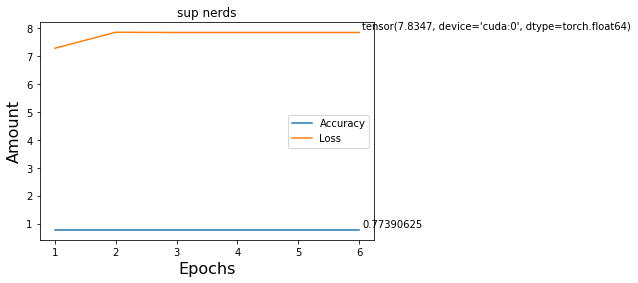

In [0]:
import matplotlib.pyplot as plt
plot_stuff(Hyperparameters.epochs, loss, accuracy)

In [0]:

torch.cuda.empty_cache()
accuracy, predicted_ys = batch_wise_evaluate(textual_entailment_model, 
         test_snopes_loader,
         Hyperparameters)
print(predicted_ys.shape)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


torch.Size([1516])


In [0]:
print(accuracy)
evaluation_summary("textual entailment model", predicted_ys.cpu(), y_snopes_test)

0.7109375
Evaluation for: textual entailment model
Classifier 'textual entailment model' has Acc=0.720 P=0.500 R=0.360 F1=0.419
              precision    recall  f1-score   support

         0.0      1.000     0.720     0.837      1516
         1.0      0.000     0.000     0.000         0

    accuracy                          0.720      1516
   macro avg      0.500     0.360     0.419      1516
weighted avg      1.000     0.720     0.837      1516


Confusion matrix:
 [[1092    0]
 [ 424    0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


(0.5, 0.36015831134564646, 0.7203166226912929, 0.4187116564417178)